In [ ]:
from numpy import load
print("loading data")
data = load("/content/drive/My Drive/lungcancer/data_4.npy")
print("loading labels")
labels = load("/content/drive/My Drive/lungcancer/labels_4.npy")

loading data
loading labels


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.model_selection import train_test_split
(trainX, testX, trainY, testY) = train_test_split(data, labels,
                                                  test_size=0.1, stratify=labels, random_state=42,shuffle = True)

In [ ]:
trainX.shape

(900, 512, 512, 1)

In [ ]:
trainY.shape

(900,)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
aug_train = ImageDataGenerator(rescale= 1.0/255.,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

aug_test  = ImageDataGenerator(rescale= 1.0/255.)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

classifier_2 = Sequential()

# Step 1 - Convolution
classifier_2.add(Conv2D(32, (3, 3), input_shape = (512, 512, 1), activation = 'relu'))

# Step 2 - Pooling
classifier_2.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier_2.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier_2.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a third convolutional layer
classifier_2.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier_2.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a forth convolutional layer
classifier_2.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier_2.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a forth convolutional layer
classifier_2.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier_2.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a forth convolutional layer
classifier_2.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier_2.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier_2.add(Flatten())

# Step 4 - Full connection
classifier_2.add(Dense(units = 128, activation = 'relu'))
classifier_2.add(Dense(units = 128, activation = 'relu'))
classifier_2.add(Dense(units = 128, activation = 'relu'))
classifier_2.add(Dense(units = 1, activation = 'sigmoid'))

In [ ]:
classifier_2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
classifier_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 510, 510, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 255, 255, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 253, 253, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 64)        1

In [ ]:
import keras as k

In [ ]:
import time
NAME = "test_2-{}".format(int(time.time()))

In [ ]:
callbacks_2 = [
#    k.callbacks.EarlyStopping(patience=3, monitor='val_loss'),
    k.callbacks.TensorBoard(log_dir='logs\{}'.format(NAME)),
    k.callbacks.ModelCheckpoint('test_model_2.h5', save_best_only=True)]

In [ ]:
print(len(data))
#print(len(ids))# both lists, with columns specified 
print(len(labels))

1001
1001


In [ ]:
import numpy as np # linear algebra
data_new = np.array(data)
data_new.shape

(1001, 512, 512, 1)

In [ ]:
import numpy as np # linear algebra
labels_new = np.array(labels)
labels_new.shape

(1001,)

In [ ]:
print(data.shape)
print(labels.shape)

(1001, 512, 512, 1)
(1001,)


In [ ]:
data_preview = data[:, :, :, 0]

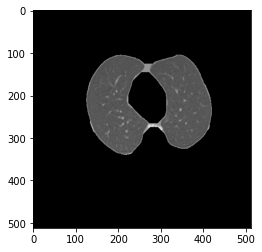

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(data_preview[100],cmap = 'gray')

In [ ]:
labels[100]

0

Classification

In [ ]:
data_preview.shape

(1001, 512, 512)

In [ ]:
test_image = data_preview[50]

In [ ]:
test_image.shape

(512, 512)

In [ ]:
test_image.dtype

dtype('float64')

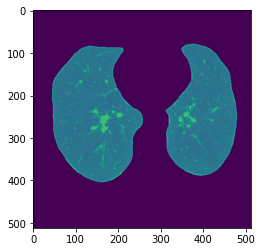

In [ ]:
plt.imshow(test_image)

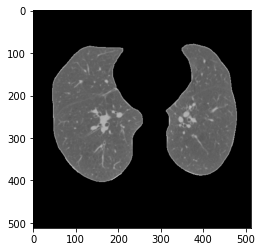

In [ ]:
plt.imshow(test_image, cmap = 'gray')

In [ ]:
from skimage import color 
image = skimage.color.gray2rgb(test_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


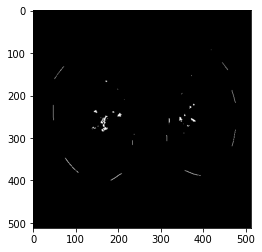

In [ ]:
plt.imshow(image)

In [ ]:
image.shape

(512, 512, 3)

In [ ]:
import cv2
import numpy as np
img = np.array(test_image, dtype=np.uint8)
color_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

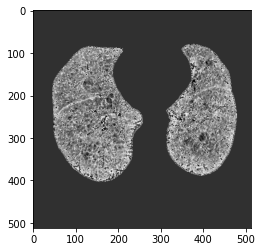

In [ ]:
plt.imshow(color_img)

In [ ]:
color_img.shape

(512, 512, 3)

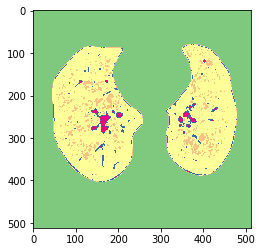

In [ ]:
plt.imshow(data_preview[50], cmap='Accent')

In [ ]:
labels[50]

1

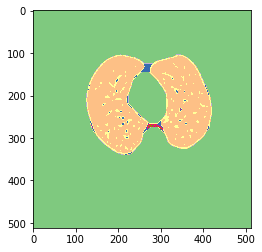

In [ ]:
plt.imshow(data_preview[100], cmap='Accent')

In [ ]:
labels[100]

0